# Práctica 5 — Preprocesamiento de datos con Python

markdown
markdown
## Recomendaciones finales y comprobación de entregables

Puntos adicionales revisados para completar la práctica:

- Correlación alta entre variables: si detectas pares con correlación elevada (>0.8) considera:

- Normalización por norma unitaria (L2): funciona cuando los vectores de entrada no son nulos y se quiere comparar direcciones (cosine similarity). Es útil para k-NN con distancia coseno y para modelos donde la magnitud absoluta no aporta información útil. Para que la normalización "converja" en algoritmos iterativos (SGD, optimizadores de gradiente) los features deberían estar ya en rangos similares o estandarizados — esto acelera la convergencia.

- Binarización (umbral 0): en este notebook se aplicó sobre la versión Min-Max (0-1) marcando >0 como presencia. Ajusta el umbral si necesitas otra definición (por ejemplo >0.5).

- Imputación: usamos la mediana por ser robusta a valores extremos; puedes comparar con media, KNN-imputation o modelos para imputación si deseas mejorar performance.

























- `P5-CayPre-Reporte-Preproc.txt` — reporte breve de transformaciones y observaciones- `pacientes_binary_threshold0.csv` — atributos binarizados con umbral 0- `pacientes_normalized_l2.csv` — L2-normalized per sample        print(f'✗ {fn} NO encontrado — ejecuta las celdas de preprocesamiento para generarlo')    else:                print('  Error leyendo CSV:', e)            except Exception as e:                print(df_check.head(2))                df_check = pd.read_csv(path)            try:        if fn.endswith('.csv'):        print(f'✓ {fn} encontrado — tamaño: {os.path.getsize(path)} bytes')    if os.path.exists(path):    path = os.path.join(out_dir, fn)for fn in expected:expected = ['pacientes_minmax.csv','pacientes_standardized.csv','pacientes_normalized_l2.csv','pacientes_binary_threshold0.csv','P5-CayPre-Reporte-Preproc.txt']out_dir = r'd:\maestria\mdm-framework\p5'import os# Comprobación de archivos generados (ejecutar después de correr las transformaciones)pythoncodeA continuación se ejecuta una comprobación rápida para listar los archivos de salida esperados y mostrar sus cabeceras si existen en la carpeta de la práctica. Ejecuta esta celda después de correr todo el notebook para verificar resultados.- Evaluación recomendada: ejecutar regresión logística y k-NN con validación cruzada comparando las 3 transformaciones (min-max, z-score, L2) para elegir la mejor pipeline.- `pacientes_minmax.csv` — min-max scaled (0-1)
- `pacientes_standardized.csv` — z-score standardized
- `pacientes_normalized_l2.csv` — L2-normalized per sample
- `pacientes_binary_threshold0.csv` — atributos binarizados con umbral 0
- `P5-CayPre-Reporte-Preproc.txt` — reporte breve de transformaciones y observaciones

In [1]:
# Instalación de dependencias (opcional)
import sys
import subprocess

packages = ['pandas','numpy','matplotlib','seaborn','scikit-learn']
for p in packages:
    try:
        __import__(p)
    except Exception:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', p])

print('Dependencias comprobadas')

Dependencias comprobadas


In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import os

plt.style.use('seaborn')

# Ruta del archivo
csv_path = r'd:\maestria\mdm-framework\p5\pacientes.csv'

# Nombres de columnas según enunciado de la práctica
cols = ['Pregnancies','PlasmaGlucose','DiastolicBP','TricepsSkinFold','TwoHourInsulin','BMI','DiabetesPedigree','Age','Outcome']

# Cargar datos
df = pd.read_csv(csv_path, header=None, names=cols)
print('Dimensiones:', df.shape)
print(df.head())

Dimensiones: (768, 9)
   Pregnancies  PlasmaGlucose  DiastolicBP  TricepsSkinFold  TwoHourInsulin  \
0            0            137           40               35             168   
1            0            118           84               47             230   
2            0            180           66               39               0   
3            0            100           88               60             110   
4            0            146           82                0               0   

    BMI  DiabetesPedigree  Age  Outcome  
0  43.1             2.288   33        1  
1  45.8             0.551   31        1  
2  42.0             1.893   25        1  
3  46.8             0.962   31        0  
4  40.5             1.781   44        0  


## Actividad 1: Conocer los datos
- a) Identificar número de registros y campos
- b) Distribución de clases y observaciones sobre balanceo
- c) Estadística descriptiva por atributo
- d) Relaciones por correlación
- e) Histogramas univariados

Registros: 768
Columnas: ['Pregnancies', 'PlasmaGlucose', 'DiastolicBP', 'TricepsSkinFold', 'TwoHourInsulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']

Distribución de la clase Outcome:
0    500
1    268
Name: Outcome, dtype: int64

Porcentajes:
0    65.104167
1    34.895833
Name: Outcome, dtype: float64

Estadística descriptiva (primeras columnas):
                  count        mean         std     min       25%       50%  \
Pregnancies       768.0    3.845052    3.369578   0.000   1.00000    3.0000   
PlasmaGlucose     768.0  120.894531   31.972618   0.000  99.00000  117.0000   
DiastolicBP       768.0   69.105469   19.355807   0.000  62.00000   72.0000   
TricepsSkinFold   768.0   20.536458   15.952218   0.000   0.00000   23.0000   
TwoHourInsulin    768.0   79.799479  115.244002   0.000   0.00000   30.5000   
BMI               768.0   31.992578    7.884160   0.000  27.30000   32.0000   
DiabetesPedigree  768.0    0.471876    0.331329   0.078   0.24375    0.3725   
Age         

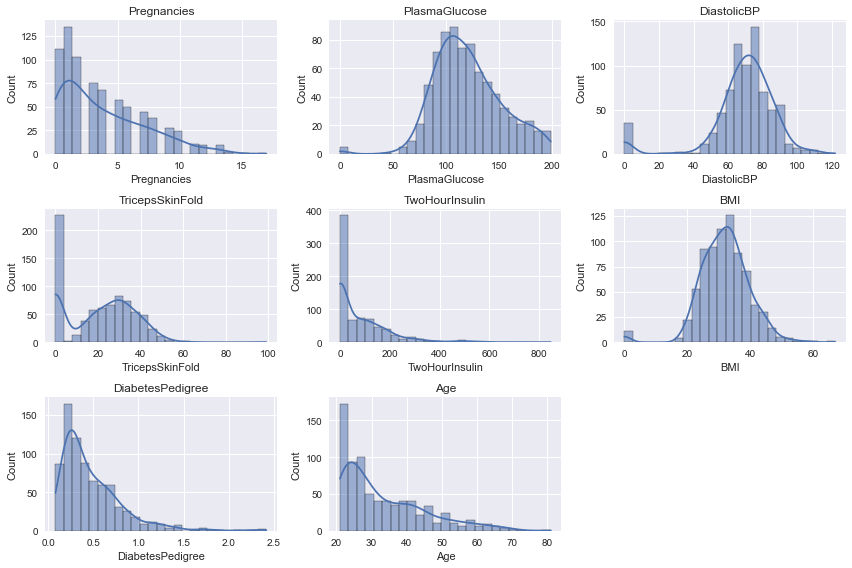

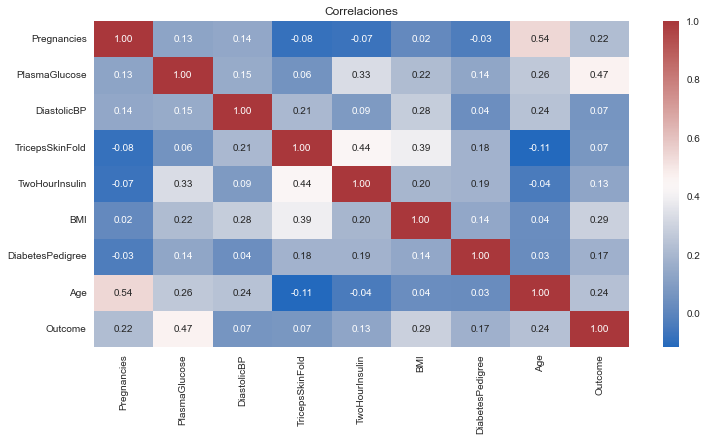

In [3]:
# a) Número de registros y campos
print('Registros:', len(df))
print('Columnas:', df.columns.tolist())

# b) Distribución de clases (Outcome)
print('\nDistribución de la clase Outcome:')
print(df['Outcome'].value_counts())
print('\nPorcentajes:')
print(df['Outcome'].value_counts(normalize=True)*100)

# c) Estadística descriptiva
print('\nEstadística descriptiva (primeras columnas):')
print(df.describe().T)

# d) Correlación
corr = df.corr()
print('\nMatriz de correlación (pearson):')
print(corr)

# e) Histogramas y boxplots (se muestran, excepto en ejecuciones no interactivas)
plt.figure(figsize=(12,8))
for i, col in enumerate(cols[:-1], 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col].dropna(), kde=True, bins=25)
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlaciones')
plt.show()

Observaciones iniciales:
- Algunos atributos (PlasmaGlucose, TricepsSkinFold, TwoHourInsulin, BMI) usan 0 para indicar falta de medición: tratarlos como missing para análisis.
- Clase objetivo `Outcome` es binaria.

In [4]:
# Marcar ceros como NaN en ciertas columnas según convención Pima
cols_with_zeros_missing = ['PlasmaGlucose','TricepsSkinFold','TwoHourInsulin','BMI','DiastolicBP']
df_missing = df.copy()
for c in cols_with_zeros_missing:
    df_missing[c] = df_missing[c].replace(0, np.nan)

print('Nulos por columna tras reemplazo de ceros por NaN:')
print(df_missing.isnull().sum())

# Mostrar casos con missing
print('\nEjemplos con NaN:')
print(df_missing[cols_with_zeros_missing].head())

Nulos por columna tras reemplazo de ceros por NaN:
Pregnancies           0
PlasmaGlucose         5
DiastolicBP          35
TricepsSkinFold     227
TwoHourInsulin      374
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome               0
dtype: int64

Ejemplos con NaN:
   PlasmaGlucose  TricepsSkinFold  TwoHourInsulin   BMI  DiastolicBP
0          137.0             35.0           168.0  43.1         40.0
1          118.0             47.0           230.0  45.8         84.0
2          180.0             39.0             NaN  42.0         66.0
3          100.0             60.0           110.0  46.8         88.0
4          146.0              NaN             NaN  40.5         82.0


## Actividad 2: Preprocesar los datos
- a) Re-escalar a rango 0-1 (Min-Max)
- b) Estandarizar (media 0, desviación 1)
- c) Re-escalar por norma unitaria (L2)
- d) Binarizar atributos con umbral 0 (valores > 0 → 1, <=0 → 0)

También se describe qué algoritmos se benefician de cada transformación.

In [5]:
# Preparar data para transformaciones: rellenar NaN con la mediana (opción razonable para este dataset)
df_fill = df_missing.copy()
for c in cols_with_zeros_missing:
    med = df_fill[c].median()
    df_fill[c] = df_fill[c].fillna(med)

# Separar features y target
X = df_fill[cols[:-1]].astype(float)
y = df_fill['Outcome']

# a) Min-Max scaling
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)

# b) Standardization (z-score)
scaler_std = StandardScaler()
X_std = pd.DataFrame(scaler_std.fit_transform(X), columns=X.columns)

# c) L2 Normalizer (normalizar por muestra)
normalizer = Normalizer(norm='l2')
X_l2 = pd.DataFrame(normalizer.fit_transform(X), columns=X.columns)

# d) Binarización con umbral 0 (valores > 0 → 1, else 0)
# Aplicable sobre X_minmax para que >0 signifique diferencia respecto al min
X_binary = (X_minmax > 0).astype(int)

# Guardar resultados como CSV
out_dir = r'd:\maestria\mdm-framework\p5'
X_minmax.join(y).to_csv(os.path.join(out_dir,'pacientes_minmax.csv'), index=False)
X_std.join(y).to_csv(os.path.join(out_dir,'pacientes_standardized.csv'), index=False)
X_l2.join(y).to_csv(os.path.join(out_dir,'pacientes_normalized_l2.csv'), index=False)
X_binary.join(y).to_csv(os.path.join(out_dir,'pacientes_binary_threshold0.csv'), index=False)

print('Archivos guardados en', out_dir)
print('Min-Max sample:')
print(X_minmax.head())

Archivos guardados en d:\maestria\mdm-framework\p5
Min-Max sample:
   Pregnancies  PlasmaGlucose  DiastolicBP  TricepsSkinFold  TwoHourInsulin  \
0          0.0       0.600000     0.163265         0.304348        0.185096   
1          0.0       0.477419     0.612245         0.434783        0.259615   
2          0.0       0.877419     0.428571         0.347826        0.133413   
3          0.0       0.361290     0.653061         0.576087        0.115385   
4          0.0       0.658065     0.591837         0.239130        0.133413   

        BMI  DiabetesPedigree       Age  
0  0.509202          0.943638  0.200000  
1  0.564417          0.201964  0.166667  
2  0.486708          0.774979  0.066667  
3  0.584867          0.377455  0.166667  
4  0.456033          0.727156  0.383333  


Comentarios técnicos — qué algoritmos se benefician:
- Min-Max (0-1): útil para redes neuronales (sigmoid/tanh), k-NN, y cuando se desea preservar forma de distribución.
- Standardization (z-score): útil para SVM, regresión logística, PCA, y modelos que asumen datos centrados.
- L2 Normalization per-sample: útil cuando se usan distancias/cosine similarity o modelos basados en texto/vectores; también para k-NN en espacios con magnitudes distintas.
- Binarización: útil para modelos que consumen features binarias (reglas, árboles con features binarias, Naive Bayes Bernoulli).

In [6]:
# Medir efecto: comparar medias y desviaciones
summary = pd.DataFrame({
    'original_mean': X.mean(),
    'original_std': X.std(),
    'minmax_min': X_minmax.min(),
    'minmax_max': X_minmax.max(),
    'std_mean': X_std.mean(),
    'std_std': X_std.std()
})
print(summary.round(3))

                  original_mean  original_std  minmax_min  minmax_max  \
Pregnancies               3.845         3.370         0.0         1.0   
PlasmaGlucose           121.656        30.438         0.0         1.0   
DiastolicBP              72.387        12.097         0.0         1.0   
TricepsSkinFold          29.108         8.791         0.0         1.0   
TwoHourInsulin          140.672        86.383         0.0         1.0   
BMI                      32.455         6.875         0.0         1.0   
DiabetesPedigree          0.472         0.331         0.0         1.0   
Age                      33.241        11.760         0.0         1.0   

                  std_mean  std_std  
Pregnancies           -0.0    1.001  
PlasmaGlucose          0.0    1.001  
DiastolicBP            0.0    1.001  
TricepsSkinFold       -0.0    1.001  
TwoHourInsulin         0.0    1.001  
BMI                    0.0    1.001  
DiabetesPedigree      -0.0    1.001  
Age                   -0.0    1.001  


In [7]:
# Guardar report corto
report = []
report.append('Práctica 5 - Resumen de preprocesamiento')
report.append(f'Registros originales: {len(df)}')
report.append('\nNulos detectados (columns con 0->NaN):')
report.append(str(df_missing.isnull().sum().to_dict()))
report.append('\nArchivos generados:')
report.append('- pacientes_minmax.csv')
report.append('- pacientes_standardized.csv')
report.append('- pacientes_normalized_l2.csv')
report.append('- pacientes_binary_threshold0.csv')

with open(os.path.join(out_dir,'P5-CayPre-Reporte-Preproc.txt'), 'w', encoding='utf-8') as f:
    f.write('\n'.join(report))

print('Reporte guardado en P5-CayPre-Reporte-Preproc.txt')

Reporte guardado en P5-CayPre-Reporte-Preproc.txt


## Actividad 3: Entregar programa y datos
- El notebook guarda los archivos de salida indicados y un reporte breve.
- Adjunte los CSV generados al entregar.

Siguientes pasos sugeridos:
- Ejecutar modelos (logistic regression, k-NN) comparando performance con y sin estandarización.
- Realizar validación cruzada para elegir mejor preprocesamiento.